In [2]:
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
import json
import time
import re

In [6]:
df_channels = pd.read_csv("../data/all_sources.csv")
df_channels.index  = df_channels["Id"]
tmp = df_channels.drop("Id", axis=1).to_dict()
indexes = list(df_channels.index.values)
name_dict = tmp["Name"]
cate_dict = tmp["Category"]

In [11]:
df_channels

,Name,Category,Sub-Category,Data Collection step,Id
Id,,,,,
UCSTy-H5lSiCcozas32sfJlQ,AltRight.com,Alt-right,Alt-right,1,UCSTy-H5lSiCcozas32sfJlQ
UCMLbmp5tcLxzahMLTmeM4lg,AmRenVideos,Alt-right,Alt-right,1,UCMLbmp5tcLxzahMLTmeM4lg
UCyZVnp-_owuoPlzNJNtaxZQ,AmRen Podcasts,Alt-right,Alt-right,1,UCyZVnp-_owuoPlzNJNtaxZQ
UCGJNdaSwFeP3pLd1MhN0dRg,Darkstream,Alt-right,Alt-right,1,UCGJNdaSwFeP3pLd1MhN0dRg
UCutpp9X6rKErxUkv4wKBRPA,Voxiversity,Alt-right,Alt-right,1,UCutpp9X6rKErxUkv4wKBRPA
UCAgBUlIpzlJaE0693J3s97w,iambakedalaska,Alt-right,Alt-right,1,UCAgBUlIpzlJaE0693J3s97w
UCXfJ65sVQ5F3nJsm86yM6jA,Baked Alaska 2,Alt-right,Alt-right,1,UCXfJ65sVQ5F3nJsm86yM6jA
UC2JVrseRgh0ccDQ7c8qnXTQ,Johnny Monoxide,Alt-right,Alt-right,1,UC2JVrseRgh0ccDQ7c8qnXTQ
UC_NPMpK-gZVIKqvDRljgbBA,NPI / Radix,Alt-right,Alt-right,1,UC_NPMpK-gZVIKqvDRljgbBA


In [18]:
df_final = None

for i in indexes:
    try:
        df = pd.read_csv("~/yt/{0}.csv".format(i))
    except FileNotFoundError:
        continue
    except Exception:
        continue
    try:
        df.upload_date = df.upload_date.apply(lambda x: time.mktime(datetime.strptime(str(x), '%Y%m%d').timetuple()))
    except ValueError:
        print(i)
        continue
        
    df["no_captions"] = df.captions.isnull()
    df["no_comments"] = df.comments.isnull()
    df["name"] = name_dict[i]
    df.drop("captions", axis=1, inplace=True)
    df.drop("comments", axis=1, inplace=True)
    if df_final is None:
        df_final = df
    else:
        df_final = pd.concat([df_final, df])

df_final

UCwd_sSDZ8EQt6SEeOO2tBRA


,Id,category,description,dislike_count,id,like_count,name,step,title,upload_date,video_id,view_count,no_captions,no_comments
0,UCQMb7c66tJ7Si8IrWHOgAPg,Intellectual Dark Web,Kaitlin Bennett was ejected from a Bernie Sand...,94.0,UCQMb7c66tJ7Si8IrWHOgAPg,5419.0,Liberty Hangout,3,Conservative Journalist Ejected From Bernie Rally,1.555211e+09,UMaC04A82Vg,76342.0,False,False
1,UCQMb7c66tJ7Si8IrWHOgAPg,Intellectual Dark Web,Two college leftists thought they could own Ka...,114.0,UCQMb7c66tJ7Si8IrWHOgAPg,4000.0,Liberty Hangout,3,College Leftists Concede Defeat to Kaitlin Ben...,1.555124e+09,pDidmcZdTGs,98363.0,False,False
2,UCQMb7c66tJ7Si8IrWHOgAPg,Intellectual Dark Web,After their attempt to take down Trump for Rus...,91.0,UCQMb7c66tJ7Si8IrWHOgAPg,6752.0,Liberty Hangout,3,Democrats Reap What They Sow,1.555124e+09,BPWWmZTWISA,109567.0,True,False
3,UCQMb7c66tJ7Si8IrWHOgAPg,Intellectual Dark Web,Trump supporters proudly flaunt their MAGA hat...,81.0,UCQMb7c66tJ7Si8IrWHOgAPg,6993.0,Liberty Hangout,3,Trump Supporters Afraid to Wear MAGA Hats,1.554779e+09,_BV6vDBLSWQ,124676.0,False,False
4,UCQMb7c66tJ7Si8IrWHOgAPg,Intellectual Dark Web,"A group of liberals from Columbus, Ohio has no...",83.0,UCQMb7c66tJ7Si8IrWHOgAPg,7279.0,Liberty Hangout,3,Liberals Admit They Won't Read Mueller Report,1.554433e+09,nJfaNi3_KBU,143385.0,False,False
5,UCQMb7c66tJ7Si8IrWHOgAPg,Intellectual Dark Web,A group of elderly liberals lost their cool at...,169.0,UCQMb7c66tJ7Si8IrWHOgAPg,10133.0,Liberty Hangout,3,Old Liberals Go Nuts at Anti Trump Protest,1.554347e+09,INazpdOlRc4,213125.0,False,False
6,UCQMb7c66tJ7Si8IrWHOgAPg,Intellectual Dark Web,"For the first time since 1946, the Cleveland I...",94.0,UCQMb7c66tJ7Si8IrWHOgAPg,3022.0,Liberty Hangout,3,Chief Wahoo Doesn't Offend Indians Fans,1.554260e+09,BZbzV8wQZdE,70643.0,False,False
7,UCQMb7c66tJ7Si8IrWHOgAPg,Intellectual Dark Web,A brainwashed liberal at the Trump rally in Gr...,436.0,UCQMb7c66tJ7Si8IrWHOgAPg,12915.0,Liberty Hangout,3,Brainwashed Liberal Doesn't Know What He's Tal...,1.554088e+09,y9CDiU8uSWY,328514.0,False,False
8,UCQMb7c66tJ7Si8IrWHOgAPg,Intellectual Dark Web,A number of angry socialists attended the Trum...,100.0,UCQMb7c66tJ7Si8IrWHOgAPg,6512.0,Liberty Hangout,3,Angry Socialists Scream at the Sky,1.554001e+09,XrhUJZWgkjI,145888.0,False,False
9,UCQMb7c66tJ7Si8IrWHOgAPg,Intellectual Dark Web,Liberal protesters at the Trump rally in Grand...,168.0,UCQMb7c66tJ7Si8IrWHOgAPg,10955.0,Liberty Hangout,3,Liberals Beg For Russia Collusion To Be True,1.553915e+09,3T9_iLtN3AQ,259492.0,False,False


In [ ]:
df_final

In [19]:
channels_present = list(set(list(df_final.channel_id.values)))
num_rows = int(np.ceil(len(channels_present) /4))

fig, axs = plt.subplots(num_rows,4,figsize=(16,2*num_rows))

axs = axs.flatten()
channels_present = list(set(list(df_final.channel_id.values)))

count = 0
for ax, channel in zip(axs, channels_present):
    count += 1
    sns.distplot(df_final[df_final.channel_id == channel].upload_date, ax=ax, kde=False)
    sns.rugplot(df_final[(df_final.channel_id == channel) & (df_final.no_comments)].upload_date, ax=ax, color="red")
    sns.rugplot(df_final[(df_final.channel_id == channel) & (df_final.no_captions)].upload_date, ax=ax, color="yellow")
    ax.set_xlim([1464750000.0, 1554087600.0])
    ax.set_title("{0} \n #videos: {1} \n w/o comments: {2} \n w/o captions {3}".format(
                    name_dict[channel], 
                    str(len(df_final[df_final.channel_id == channel])),
                    str(df_final[df_final.channel_id == channel].no_comments.sum()),
                    str(df_final[df_final.channel_id == channel].no_captions.sum())        
                    )
                )

    ax.set_xlabel("")
    ax.set_xticks([1464750000.0, 1483236000.0, 1496286000.0, 1554087600.0])

    if count <= len(channels_present) - 4:
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1464750000.0, 1483236000.0, 1496286000.0, 1554087600.0])
        ax.set_xticklabels(["2016/06", "2017/01", "2017/06","2019/04"], rotation=90)

# g = sns.FacetGrid(df_final, col='name', hue="no_comments", col_wrap=4)
# g = (g.map(sns.distplot, "upload_date", hist=True, kde=False))\
#     .set_titles("{col_name}")


plt.tight_layout()
# for ax in g.axes:
#     ax.set_xticks([1464750000.0, 1496286000.0, 1554087600.0])
#     ax.set_xticklabels(["2016/06", "2017/01", "2019/04"], rotation=90)
#     ax.set_xlim([1464750000.0, 1554087600.0])

    
# sns.distplot(df_final["upload_date"])

AttributeError: 'DataFrame' object has no attribute 'channel_id'

In [4]:
def count_ocurrence(text, string):
    if type(text) != str:
        print("ASd")
        return 0
    return len(re.findall(string, text))

def count_polarity(text):
    blob = TextBlob(text)
    acc = []
    for sentence in blob.sentences:
        acc.append(sentence.sentiment.polarity)
    
    return np.array(acc).mean()

df

,captions,category,channel_id,description,dislike_count,like_count,name,title,upload_date,video_id,view_count
0,so what do you think of my new look [Music] n...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,Understanding what your negotiating partners w...,24,907,Coach Red Pill,🔴 Negotiating Partners | Coach Red Pill,20190328,Aj30itYsapY,15081
1,you know the other day I did a video about men...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,You can find my more controversial posts on Pa...,57,2838,Coach Red Pill,🔴 Never Apologize For Speaking The Truth | Coa...,20190324,g7wDacbJ5IE,29792
2,before I get started with today's video I just...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,And this video got demonetized too! lmao. YouT...,33,2274,Coach Red Pill,🔴 Picture The Man You Want To Be | Coach Red ...,20190323,YJ4vTACsk9Y,32521
3,it troubles me greatly when I see young men wa...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,This video was demonetized before I finished p...,71,4516,Coach Red Pill,🔴 Young Men Have Legitimate Grievances | Coac...,20190321,CR-1HiAsdjE,57125
4,hi there well see you know you gotta take ris...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,I think it would sound great with a female cho...,88,788,Coach Red Pill,🔴 A Little Ditty | Coach Red Pill,20190320,iV7v5F5Z1k8,15689
5,this video is sort of like a reaction to the s...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,Join my livestreaming channel:\nhttps://www.yo...,262,3439,Coach Red Pill,🔴 The Cold Civil War is Ending | Coach Red Pill,20190319,3r2RZna05qM,62747
6,when I was growing up you know a lot of parent...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,Please help me publish my novel:\nhttps://www....,40,1704,Coach Red Pill,🔴 The Truth About Blended Families | Coach Re...,20190317,0UmTN1zb2Ak,33419
7,that motorcycle that you're seeing on screen r...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,Please help me publish my novel:\nhttps://www....,126,2464,Coach Red Pill,🔴 The Starter Girlfriend | Coach Red Pill,20190315,duqTvk4twhY,54470
11,hi there before it gets started with today's v...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,I'm publishing a novel—check it out here:\nhtt...,51,2582,Coach Red Pill,🔴 Discipline,20190309,-JQy5_3T3uI,43019
12,[Music] so recently something happened that wa...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,https://www.indiegogo.com/projects/wilshire-bo...,116,2550,Coach Red Pill,🔴 You Cannot Make Friends With SJW's,20190307,X9pKH2Jf5r0,48179


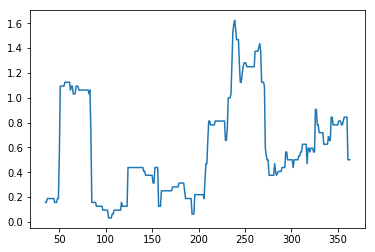

In [10]:

for i in [32]:
    tmp = df.captions.apply(lambda x: count_ocurrence(text=x, string='sjw')).rolling(window=i).mean()
    tmp = tmp[~tmp.isnull()]
    plt.plot(tmp)

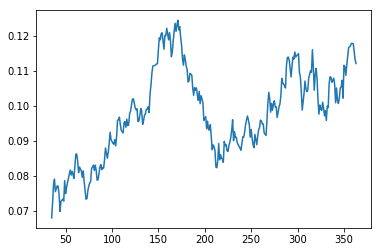

In [8]:
for i in [32]:
    tmp = df.captions.apply(count_polarity).rolling(window=i).mean()
    tmp = tmp[~tmp.isnull()]
    plt.plot(tmp)

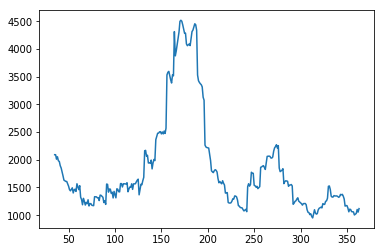

In [11]:
for i in [32]:
    tmp = df.like_count.rolling(window=i).mean()
    tmp = tmp[~tmp.isnull()]
    plt.plot(tmp)